In [1]:
!pip install tensorflow-gpu

In [2]:
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
import torch
print(torch.cuda.is_available())

True


In [4]:
# !pip3 install torch torchvision torchaudio

In [5]:
# !pip install torchvision

In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
# conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

In [8]:
# conda install pytorch torchvision cudatoolkit=10.2 -c pytorch

In [9]:
!pip install torchsummary

In [10]:
!pip install pandas

In [11]:
# !pip install tensorflow

In [12]:
# !pip install torch torchvision torchaudio

In [13]:
import torch
print(torch.cuda.is_available())

True


In [14]:
!pip install scikit_learn

In [15]:
!pip show scikit_learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\yasse\.conda\envs\tfgpu\lib\site-packages
Requires: joblib, scipy, numpy, threadpoolctl
Required-by: scikit-learn-intelex


In [16]:
!pip install opencv-python

In [17]:
!pip install tensorflow-gpu

In [18]:
# !pip install tensorflow[and-cuda]

In [19]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import torch                    # Pytorch module
import pandas as pd
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import tensorflow_hub as hub
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2 as cv
from torch.utils.data import DataLoader

In [21]:
tf.compat.v1.losses.sparse_softmax_cross_entropy

<function tensorflow.python.ops.losses.losses_impl.sparse_softmax_cross_entropy(labels, logits, weights=1.0, scope=None, loss_collection='losses', reduction='weighted_sum_by_nonzero_weights')>

In [22]:
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR

In [23]:
# Target dimensions
root_dir = "E:/Plant_images"
target_size = (300, 300)

# Walk through the directory
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        # Check if the file is an image (you can add or remove file types as needed)
        if file.endswith('.png'):
            with Image.open(os.path.join(subdir, file)) as img:
                img_resized = img.resize(target_size)

              # Save the resized image back to the filesystem
                img_resized.save(os.path.join(subdir, f'{file}'))

    print('All images have been resized.')

All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.
All images have been resized.


In [24]:
data_dir = "E:/Plant_images"
train_dir = data_dir + "/TRAIN"
valid_dir = data_dir + "/VALIDATE"
image_files = os.listdir(train_dir)

print (image_files)
print("Total classes are: {}".format(len(image_files)))

['chinesetallow_____goodoriginal', 'chinesetallow____goodblack', 'chinesetallow__badoriginal', 'chinesetallow_badblack', 'chinesetallow___badwhite', 'chinesetallow_______mediumblack', 'chinesetallow_________mediumwhite', 'chinesetallow________medium1', 'chinesetallow__________medium2', 'chinesetallow______goodwhite']
Total classes are: 10


In [25]:
# Initialize sets to store unique plants and colors
unique_classes = set()

# Loop through each file name and extract the plant and color
for filename in image_files:
    # Split the filename on underscores and the period before the file extension
    parts = filename.split('_')
    plants = parts[0]
    health = parts[-1].split('.')[0]

    # Add the extracted plant and color to the sets
    unique_classes.add(health)

# Print the number of unique plants and colors
print(f"Number of unique colors: {len(unique_classes)}")
print(f"Unique Plants health conditions are: \n{unique_classes}")

Number of unique colors: 10
Unique Plants health conditions are: 
{'medium1', 'mediumblack', 'goodblack', 'goodoriginal', 'mediumwhite', 'badwhite', 'medium2', 'badoriginal', 'goodwhite', 'badblack'}


In [26]:
nums = {}
for files in image_files:
    nums[files] = len(os.listdir(train_dir + '/' + files))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
chinesetallow_____goodoriginal              1617
chinesetallow____goodblack                   360
chinesetallow__badoriginal                  1678
chinesetallow_badblack                        93
chinesetallow___badwhite                     105
chinesetallow_______mediumblack              139
chinesetallow_________mediumwhite            122
chinesetallow________medium1                 203
chinesetallow__________medium2               220
chinesetallow______goodwhite                 573

Text(0.5, 1.0, 'Images per class.')

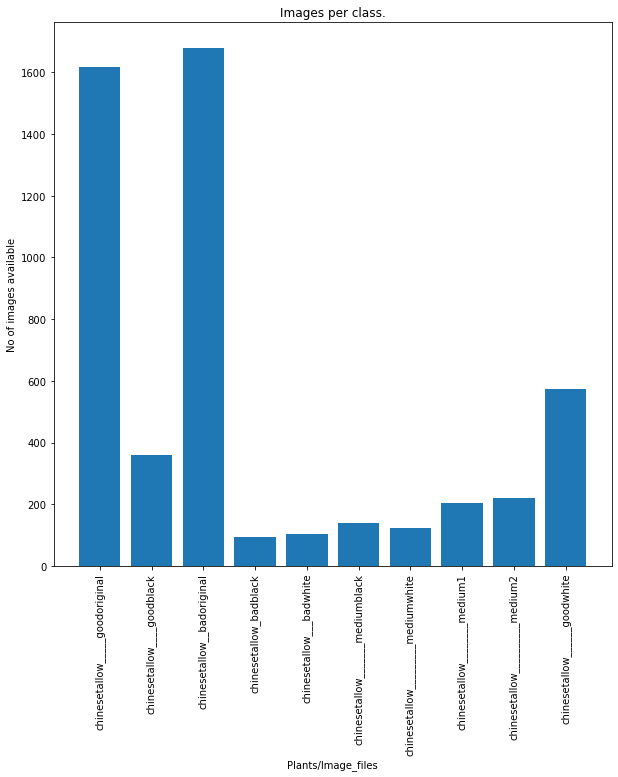

In [27]:
index = [n for n in range(10)] #CHANGE RANGE
plt.figure(figsize=(10, 10))
plt.bar(index, [n for n in nums.values()], width= 0.8)
plt.xlabel('Plants/Image_files', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, image_files, fontsize=10, rotation=90)
plt.title('Images per class.')

In [28]:
# conda install conda=23.10.0

In [29]:
# conda update -n base -c defaults conda

In [30]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 5110 images for training


In [31]:
batch_size = 20

In [32]:
transform = transforms.Compose([
    transforms.Resize((300, 300)),  # Resize the image
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    # Normalize with the mean and standard deviation used for ResNet training
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [33]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

In [34]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

In [35]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 300, 300]) 0


In [36]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :chinesetallow______goodwhite(4)


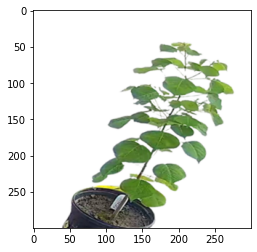

In [37]:
show_image(*train[800])

Label :chinesetallow________medium1(2)


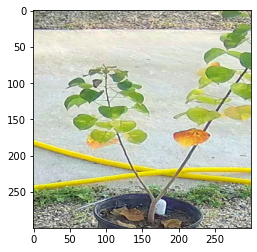

In [38]:
show_image(*train[460])

In [39]:
dataset = ImageFolder('E:/Plant_images', transform=transform)

In [40]:
# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=20, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


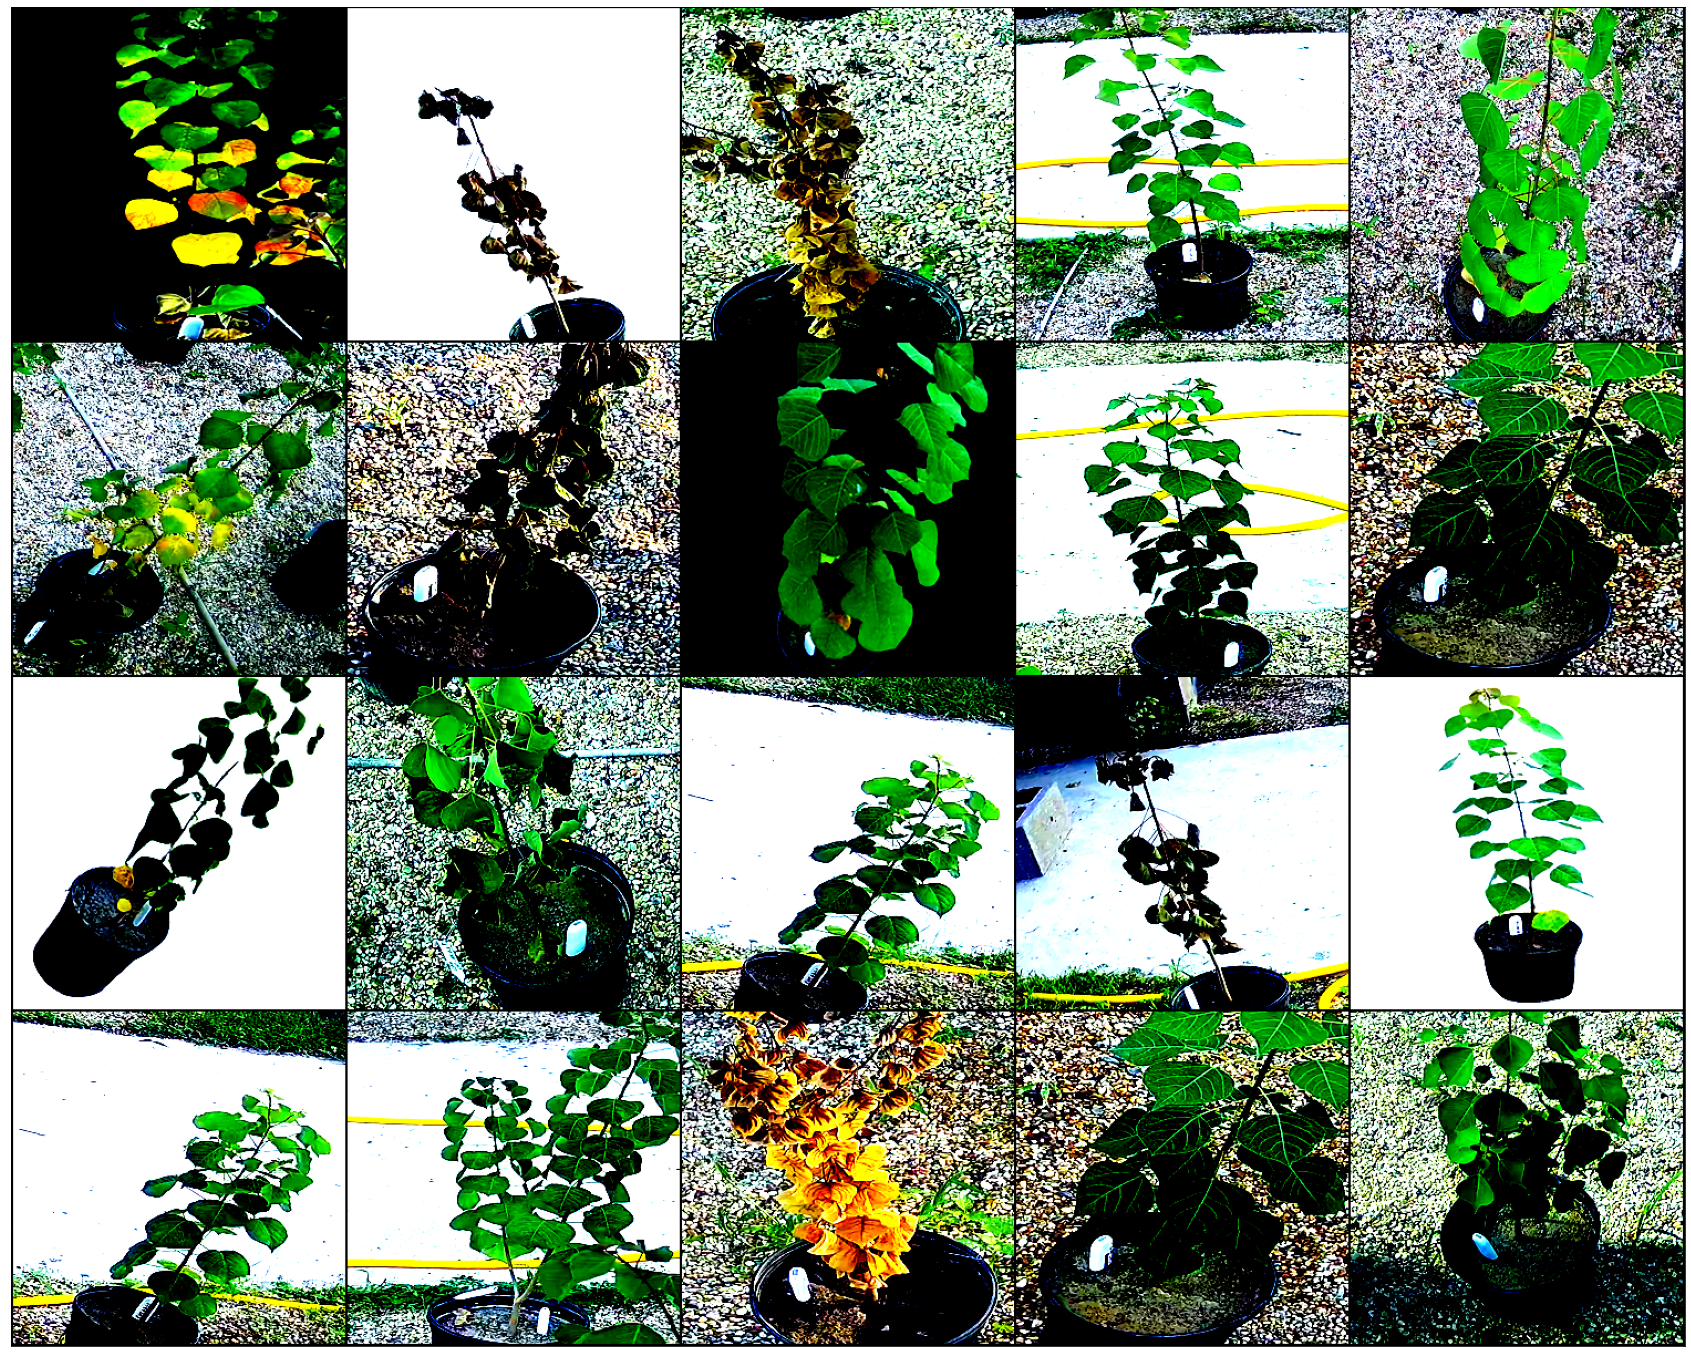

In [41]:
def show_batch(data_loader):
    for images, labels in data_loader:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        # Make sure to permute the dimensions to match what matplotlib expects
        ax.imshow(make_grid(images, nrow=5).permute(1, 2, 0))
        break

# Call the function with your DataLoader
show_batch(data_loader)

In [42]:
# for moving data into GPU (if available)
def get_default_device():
    if torch.cuda.is_available:
        return torch.device("cuda")
        # return torch.device("cpu")
    else:
        raise RuntimeError("GPU is not available")

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

device(type='cuda')

In [43]:
torch.utils.data.DataLoader

torch.utils.data.dataloader.DataLoader

In [44]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [45]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 300, 300]) 0


In [46]:
img_width, img_height = 300, 300

In [47]:
# Data preprocessing and augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data preprocessing for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5110 images belonging to 10 classes.
Found 1678 images belonging to 10 classes.


In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the BasicBlock
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

In [49]:
# Define the ResNet class
class ResNet34(nn.Module):

    def __init__(self, block, layers, num_classes=10):
        super(ResNet34, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(512 * block.expansion, num_classes)


    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)


        return x

    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels) #calculate accuracy
        return loss, acc

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)  # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)  # Assuming you have an accuracy function
        return {"val_loss": loss.detach(), "val_accuracy": acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combine loss
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy}  # Combine accuracies
    
    def step_decay(epoch, initial_lr=1e-4, drop_factor=0.5, epochs_drop=10):
        """Reduce the learning rate by a factor every few epoch."""
        return initial_lr * (drop_factor ** (epoch // epochs_drop))

    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch}], train_loss: {result['train_loss']:.4f}, val_loss: {result['val_loss']:.4f}, val_acc: {result['val_accuracy']:.4f}")

def accuracy(outputs, labels):
        _, preds = torch.max(outputs, dim=1)
        return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [254]:
from torchsummary import summary

model = ResNet34(BasicBlock, [3, 4, 6, 3], num_classes=10)

# getting summary of the model
INPUT_SHAPE = (3, 300, 300)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 150, 150]           9,408
       BatchNorm2d-2         [-1, 64, 150, 150]             128
              ReLU-3         [-1, 64, 150, 150]               0
         MaxPool2d-4           [-1, 64, 75, 75]               0
            Conv2d-5           [-1, 64, 75, 75]          36,864
       BatchNorm2d-6           [-1, 64, 75, 75]             128
              ReLU-7           [-1, 64, 75, 75]               0
            Conv2d-8           [-1, 64, 75, 75]          36,864
       BatchNorm2d-9           [-1, 64, 75, 75]             128
             ReLU-10           [-1, 64, 75, 75]               0
       BasicBlock-11           [-1, 64, 75, 75]               0
           Conv2d-12           [-1, 64, 75, 75]          36,864
      BatchNorm2d-13           [-1, 64, 75, 75]             128
             ReLU-14           [-1, 64,

In [51]:
# Moving data into CPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [52]:
model = ResNet34(BasicBlock, [3, 4, 6, 3], num_classes=10)
model.to(device)

ResNet34(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)


In [53]:
device

device(type='cuda')

In [54]:
# !pip install torch torchvision torchaudio

In [55]:
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders

In [56]:
if torch.cuda.is_available():
    print("CUDA IS AVAILABLE. USING gpu.")
else:
    print("CUDA is not available. Using GPU")

CUDA IS AVAILABLE. USING gpu.


In [57]:
# !pip install torch torchvision torchaudio

In [58]:
import torch
print(torch.__version__)
print('IS CUDA AVAILABLE:', torch.cuda.is_available())

2.1.2+cu118
IS CUDA AVAILABLE: True


In [59]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import OneCycleLR

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
def step_decay(epoch, initial_lr=1e-3, drop_rate=0.5, epochs_drop=10):
    return initial_lr * (drop_rate ** (epoch // epochs_drop))

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, initial_lr=1e-3, weight_decay=1e-3, grad_clip=0.5, drop_rate=0.5, epochs_drop=10, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
   
    
    for epoch in range(epochs):
        lr = step_decay(epoch, initial_lr, drop_rate, epochs_drop)
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
            
        # Training Phase
        model.train()
        train_losses = []
        train_accs = []
        lrs = []
        for batch in train_loader:
            loss, acc = model.training_step(batch)
            train_losses.append(loss)
            train_accs.append(acc)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record and update learning rates
            lrs.append(get_lr(optimizer))
            

        # Validation Phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_acc'] = torch.stack(train_accs).mean().item()
        result['lrs'] = lrs
        
        model.epoch_end(epoch, result)
        history.append(result)
       
#         # Early stopping logic
#         val_loss = result['val_loss']
#         if val_loss < best_val_loss:
#             best_val_loss = val_loss
#             patience_counter = 0
#         else:
#             patience_counter += 1

#         if patience_counter >= patience:
#             print("Stopping early due to no improvement in validation loss.")
#             break

    return history

In [60]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 300, 300]) 0


In [61]:
model = ResNet34(BasicBlock, [3, 4, 6, 3], num_classes=10).to(device)

In [62]:
%%time
history = [evaluate(model, valid_dl)]
history

CPU times: total: 4.91 s
Wall time: 15.9 s


[{'val_loss': tensor(2.2861, device='cuda:0'), 'val_accuracy': tensor(0.3744)}]

In [63]:
model = ResNet34(BasicBlock, [3, 4, 6, 3], num_classes=10).to(device)
optimizer = optim.Adam(model.parameters(), weight_decay=1e-3)
train_loader = train_dl # Define your training data loader
val_loader = valid_dl # Define your validation data loader
epochs = 100
# patience = 5

In [64]:
%%time
history = fit_one_cycle(epochs=epochs, max_lr=5e-4, model=model, train_loader=train_loader, val_loader=val_loader, weight_decay=1e-3, grad_clip=0.5, opt_func=optim.Adam)

Epoch [0], train_loss: 0.7751, val_loss: 1.8607, val_acc: 0.5942
Epoch [1], train_loss: 0.4514, val_loss: 0.2987, val_acc: 0.9071
Epoch [2], train_loss: 0.2778, val_loss: 1.8781, val_acc: 0.5036
Epoch [3], train_loss: 0.1883, val_loss: 0.9819, val_acc: 0.5780
Epoch [4], train_loss: 0.1858, val_loss: 1.5136, val_acc: 0.5806
Epoch [5], train_loss: 0.1441, val_loss: 0.6082, val_acc: 0.7149
Epoch [6], train_loss: 0.1684, val_loss: 0.2138, val_acc: 0.9440
Epoch [7], train_loss: 0.1075, val_loss: 0.2801, val_acc: 0.8970
Epoch [8], train_loss: 0.0987, val_loss: 0.1330, val_acc: 0.9655
Epoch [9], train_loss: 0.0865, val_loss: 0.8078, val_acc: 0.8863
Epoch [10], train_loss: 0.0497, val_loss: 0.7197, val_acc: 0.8482
Epoch [11], train_loss: 0.0375, val_loss: 0.0213, val_acc: 0.9964
Epoch [12], train_loss: 0.0398, val_loss: 0.0342, val_acc: 0.9952
Epoch [13], train_loss: 0.0377, val_loss: 0.0741, val_acc: 0.9720
Epoch [14], train_loss: 0.0288, val_loss: 0.0440, val_acc: 0.9887
Epoch [15], train_lo

In [67]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

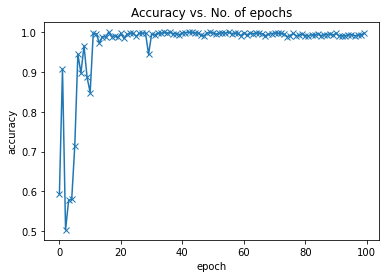

In [68]:
plot_accuracies(history)

In [104]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    
    val_losses = [x.cpu() for x in val_losses]
    
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

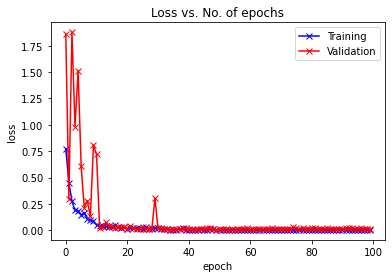

In [105]:
plot_losses(history)

In [241]:
test_dir = data_dir + "/TEST"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [242]:
test_images = sorted(os.listdir(test_dir + '/TEST'))
test_images

['GoodWhite (1).png',
 'GoodWhite (2).png',
 'GoodWhite (3).png',
 'GoodWhite (4).png',
 'GoodWhite (5).png',
 'GoodWhite (6).png',
 'bad_original (1).png',
 'bad_original (100).png',
 'bad_original (101).png',
 'bad_original (102).png',
 'bad_original (103).png',
 'bad_original (104).png',
 'bad_original (105).png',
 'bad_original (106).png',
 'bad_original (107).png',
 'bad_original (108).png',
 'bad_original (109).png',
 'bad_original (110).png',
 'bad_original (111).png',
 'bad_original (112).png',
 'bad_original (113).png',
 'bad_original (114).png',
 'bad_original (115).png',
 'bad_original (116).png',
 'bad_original (117).png',
 'bad_original (118).png',
 'bad_original (119).png',
 'bad_original (120).png',
 'bad_original (121).png',
 'bad_original (122).png',
 'bad_original (123).png',
 'bad_original (124).png',
 'bad_original (125).png',
 'bad_original (126).png',
 'bad_original (127).png',
 'bad_original (128).png',
 'bad_original (129).png',
 'bad_original (130).png',
 'bad_

In [243]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

Label: GoodWhite (2).png , Predicted: chinesetallow______goodwhite


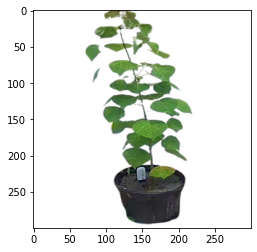

In [244]:
# predicting first image
img, label = test[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[1], ', Predicted:', predict_image(img, model))

Label: GoodWhite (1).png , Predicted: chinesetallow______goodwhite


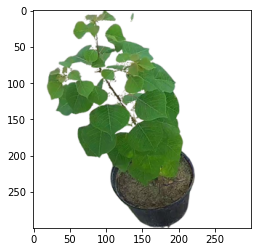

In [245]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [246]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: GoodWhite (1).png , Predicted: chinesetallow______goodwhite
Label: GoodWhite (2).png , Predicted: chinesetallow______goodwhite
Label: GoodWhite (3).png , Predicted: chinesetallow______goodwhite
Label: GoodWhite (4).png , Predicted: chinesetallow______goodwhite
Label: GoodWhite (5).png , Predicted: chinesetallow______goodwhite
Label: GoodWhite (6).png , Predicted: chinesetallow______goodwhite
Label: bad_original (1).png , Predicted: chinesetallow__badoriginal
Label: bad_original (100).png , Predicted: chinesetallow__badoriginal
Label: bad_original (101).png , Predicted: chinesetallow__badoriginal
Label: bad_original (102).png , Predicted: chinesetallow__badoriginal
Label: bad_original (103).png , Predicted: chinesetallow__badoriginal
Label: bad_original (104).png , Predicted: chinesetallow__badoriginal
Label: bad_original (105).png , Predicted: chinesetallow__badoriginal
Label: bad_original (106).png , Predicted: chinesetallow__badoriginal
Label: bad_original (107).png , Predicte

In [248]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Sample actual and predicted labels
actual_labels = [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3]
predicted_labels = [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 8, 8, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3]
num_classes = 9

# Create the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Function to calculate TP, TN, FP, FN for a given class
def get_confusion_matrix_elements(cm, class_index):
    TP = cm[class_index, class_index]
    FP = cm[:, class_index].sum() - TP
    FN = cm[class_index, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    return TP, TN, FP, FN

# Calculate metrics for each class
for i in range(num_classes):
    TP, TN, FP, FN = get_confusion_matrix_elements(cm, i)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0
   
    print(f"Class {i}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}\n")

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Class 0:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class 1:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class 2:
Accuracy: 0.9581993569131833
Precision: 0.9022556390977443
Recall: 1.0
F1 Score: 0.9486166007905138

Class 3:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class 4:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class 5:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class 6:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class 7:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Class 8:
Accuracy: 0.9581993569131833
Precision: 1.0
Recall: 0.8925619834710744
F1 Score: 0.9432314410480349

Confusion Matrix:
[[  7   0   0   0   0   0   0   0   0]
 [  0   7   0   0   0   0   0   0   0]
 [  0   0 120   0   0   0   0   0   0]
 [  0   0   0   7   0   0   0   0   0]
 [  0   0   0   0   6   0   0   0   0]
 [  0   0   0   0   0  14   0   0   0]
 [  0   0   0   0   0   0  17   0   0]
 [  0   0   0   0   0   0   0  12 

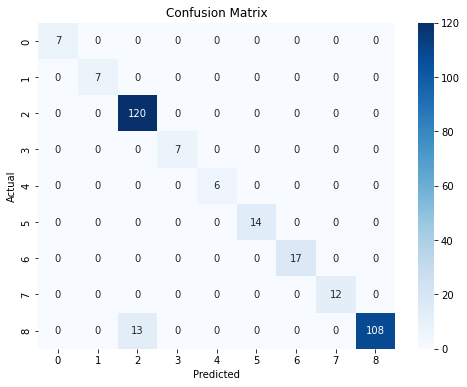

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

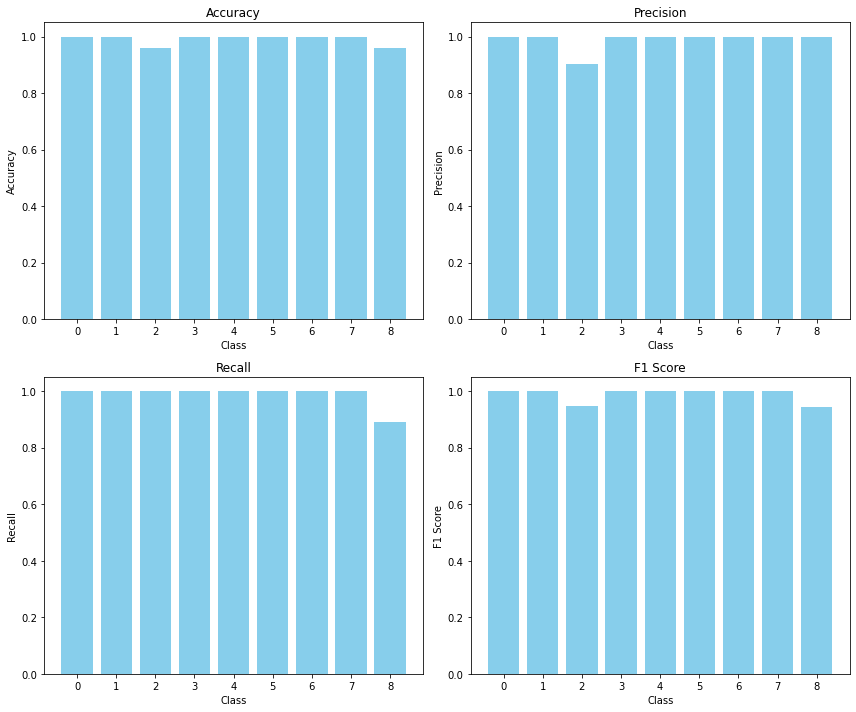

In [251]:
# Calculate and plot metrics for each class
metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
for i in range(num_classes):
    TP, TN, FP, FN = get_confusion_matrix_elements(cm, i)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0
   
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1_score)

# Plot metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, (metric, values) in enumerate(metrics.items()):
    ax = axes[i // 2, i % 2]
    ax.bar(range(num_classes), values, color='skyblue')
    ax.set_title(metric)
    ax.set_xlabel('Class')
    ax.set_ylabel(metric)
    ax.set_xticks(range(num_classes))
plt.tight_layout()
plt.show()

In [252]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(actual_labels, predicted_labels, target_names=[str(i) for i in range(num_classes)])

# Print classification report
print("\nClassification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       0.90      1.00      0.95       120
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        12
           8       1.00      0.89      0.94       121

    accuracy                           0.96       311
   macro avg       0.99      0.99      0.99       311
weighted avg       0.96      0.96      0.96       311

